# Laporan Proyek Machine Learning - Rizky Adhi Nugroho
email : nugrohorizkyadhi@gmail.com
#### Predictive analytics klasifikasi pada faktor faktor hubungan yang mempengaruhi heart disease 
#### metode :


1.   Regresi Logistik
2.   Algoritma KNN



## Data Loading

### import library dan data dari gdrive

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

#import data dari drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ekstrak zip

In [2]:
! unzip /content/drive/MyDrive/dataheart.zip
#tentukan dataframe
df = pd.read_csv("/content/heart.csv")

Archive:  /content/drive/MyDrive/dataheart.zip
  inflating: heart.csv               


### bentuk dataframe

In [3]:
print(df.tail())

      age  sex  cp  trestbps  chol  ...  oldpeak  slope  ca  thal  target
1020   59    1   1       140   221  ...      0.0      2   0     2       1
1021   60    1   0       125   258  ...      2.8      1   1     3       0
1022   47    1   0       110   275  ...      1.0      1   1     2       0
1023   50    0   0       110   254  ...      0.0      2   0     2       1
1024   54    1   0       120   188  ...      1.4      1   1     3       0

[5 rows x 13 columns]


### EDA ( Deskripsi Data )

In [4]:
print(df.describe())
print(df.info())
print(df.shape)

               age          sex  ...         thal       target
count  1025.000000  1025.000000  ...  1025.000000  1025.000000
mean     54.434146     0.695610  ...     2.323902     0.513171
std       9.072290     0.460373  ...     0.620660     0.500070
min      29.000000     0.000000  ...     0.000000     0.000000
25%      48.000000     0.000000  ...     2.000000     0.000000
50%      56.000000     1.000000  ...     2.000000     1.000000
75%      61.000000     1.000000  ...     3.000000     1.000000
max      77.000000     1.000000  ...     3.000000     1.000000

[8 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   restecg   1025 non-null  

### visualisasi data target sebelum di clean

   jumlah sampel  persentase
1            526        51.3
0            499        48.7


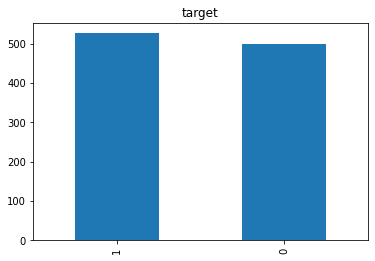

In [5]:
fitur = "target"
count = df[fitur].value_counts()
percent = 100*df[fitur].value_counts(normalize=True)
dt = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dt)
count.plot(kind='bar', title=fitur);

## Data Preparation

### EDA ( data Missing value, duplikasi, inkonsisten, dan Outliers )

#### missing value dan duplikasi data

In [6]:
# mencari missing value
print(df.isnull().sum())
print(df.isna().sum())

#mencari data terduplikasi
print("data duplikasi:", df.duplicated().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
data duplikasi: 723


#### Cek data Inkonsisten

In [7]:
#mencari nilai yang tidak konsisten (nilai negatif pada data)
continuous_features = ['age',
                      'trestbps',
                      'chol',
                      'thalach',
                      'oldpeak'
                     ]
for feature in continuous_features:
    print(str(feature)+': '+str(sum(df[feature] < 0)))

age: 0
trestbps: 0
chol: 0
thalach: 0
oldpeak: 0


#### visualisasi outliers dengan boxplot

AxesSubplot(0.125,0.125;0.775x0.755)


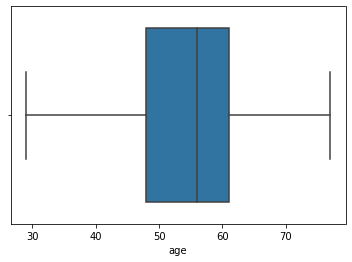

In [8]:
#boxlplot kolom age
print(sns.boxplot(x=df['age']))

AxesSubplot(0.125,0.125;0.775x0.755)


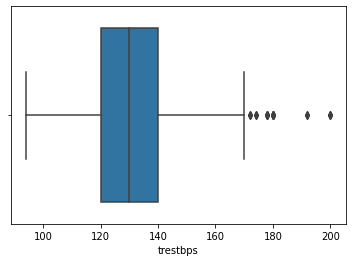

In [9]:
#boxlplot kolom trestbps
print(sns.boxplot(x=df['trestbps']))

AxesSubplot(0.125,0.125;0.775x0.755)


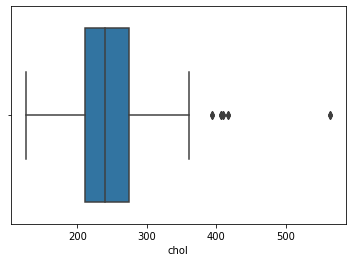

In [10]:
#boxlplot kolom chol
print(sns.boxplot(x=df['chol']))

AxesSubplot(0.125,0.125;0.775x0.755)


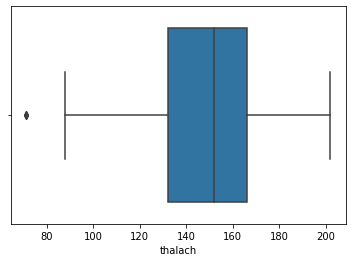

In [11]:
#boxlplot kolom thalach
print(sns.boxplot(x=df['thalach']))

AxesSubplot(0.125,0.125;0.775x0.755)


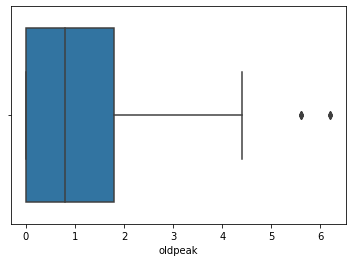

In [12]:
#boxlplot kolom oldpeak
print(sns.boxplot(x=df['oldpeak']))

####mengatasi outliers

In [13]:
#identifikasi outlier dan ubah ke null
for i in ['trestbps', 'chol', 'thalach', 'oldpeak']:
  Q1,Q3 = np.percentile(df.loc[:,i],[25,75])
  IQR = Q3 - Q1
  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)
  df.loc[df[i] < lower,i] = np.nan
  df.loc[df[i] > upper,i] = np.nan

df.isnull().sum()

age          0
sex          0
cp           0
trestbps    30
chol        16
restecg      0
thalach      4
exang        0
oldpeak      7
slope        0
ca           0
thal         0
target       0
dtype: int64

In [14]:
#imputasi outlier dengan median
columnc=['trestbps', 'chol', 'thalach', 'oldpeak']
for i in columnc:
  df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

print(df.isnull().sum())
print(df.shape)

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
(1025, 13)


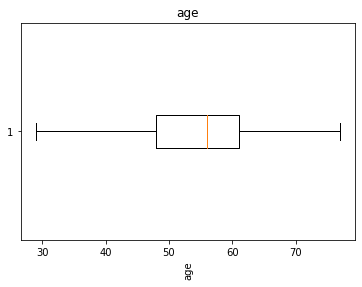

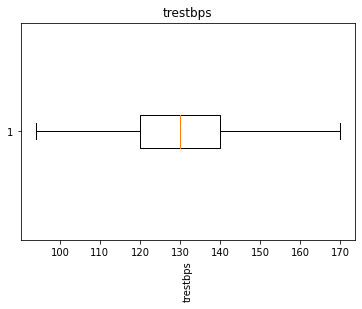

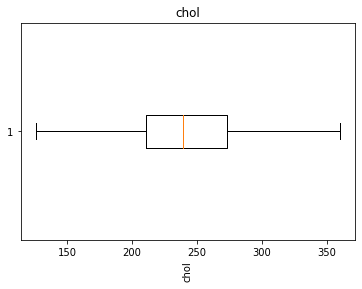

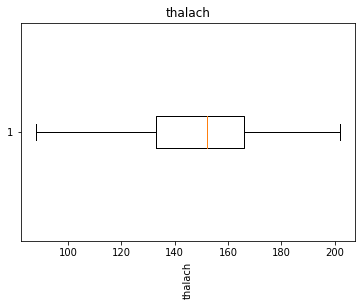

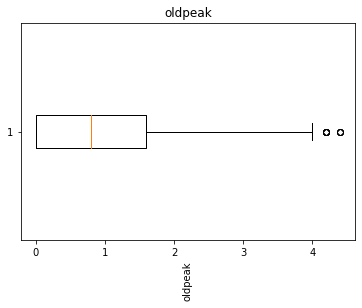

In [15]:
#membuat boxplot setelah menangani outlier

for cf in continuous_features:
    plt.boxplot(df[cf], vert=False)
    plt.title(cf)
    plt.xlabel(xlabel = cf,
               rotation=90)

    plt.show();

### EDA ( Univariate analysis )

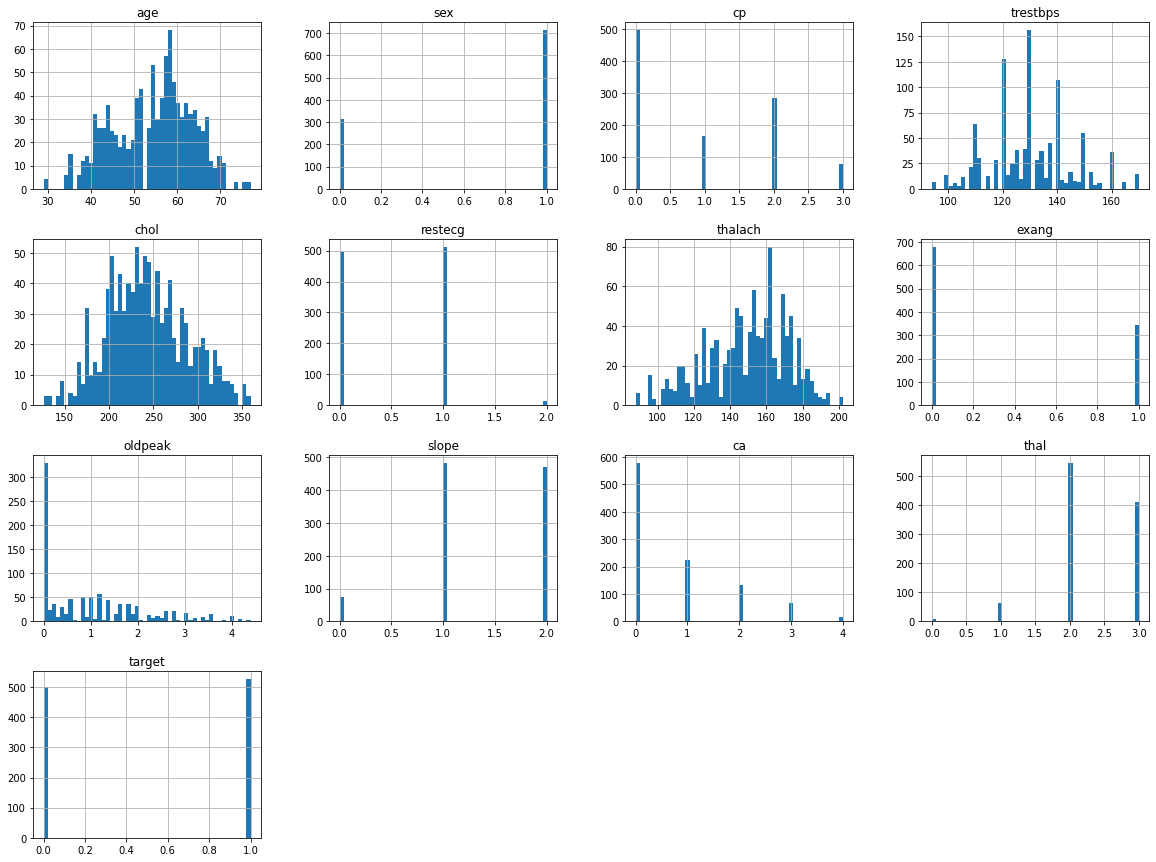

In [16]:
# univariate EDA
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca','thal', 'target']

df.hist(bins=50, figsize=(20,15))
plt.show()

   jumlah sampel  persentase
1            526        51.3
0            499        48.7


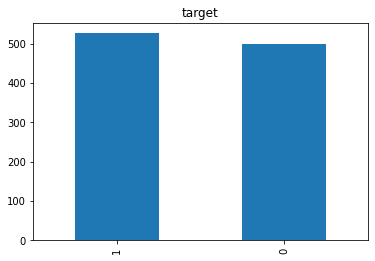

In [17]:
feature = categorical_features[7]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dt = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dt)
count.plot(kind='bar', title=feature);

### EDA (Multivariate analysis)

#### Melihat korelasi antar variabel dengan heatmap

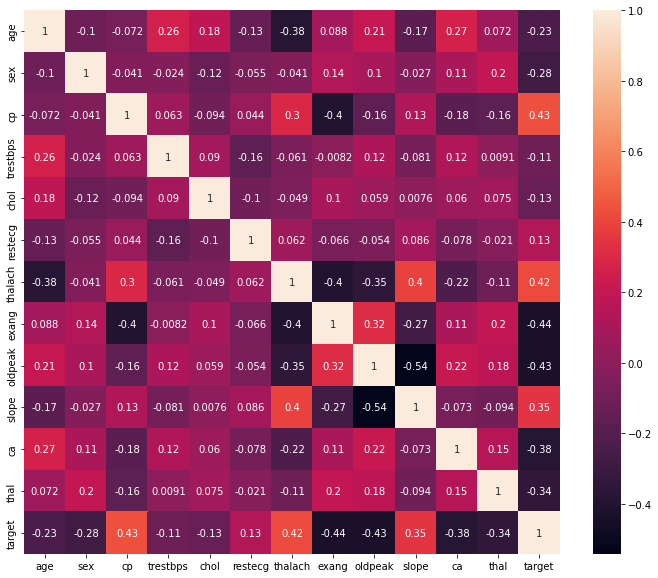

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), 
            annot=True);

### Split data

In [19]:
#split data 80 20
from sklearn.model_selection import train_test_split

X = df.drop(["target"],axis =1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1025
Total # of sample in train dataset: 820
Total # of sample in test dataset: 205


## Model Development

### Model Logistik Regression

In [21]:
#model Logistic Regression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Model KNN

In [22]:
#model KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)

## Evaluasi Model

#### model LR

In [23]:
# Model logistik Regression
print(classification_report(y_test, y_pred))
print("akurasi LR :", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        98
           1       0.82      0.93      0.87       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

akurasi LR : 0.8536585365853658


#### Model KNN

In [24]:
# Model  KNN
print(classification_report(y_test, y_pred2))
print("akurasi model knn:", knn.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        98
           1       0.94      0.93      0.93       107

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205

akurasi model knn: 0.9317073170731708


In [25]:
models = [model_logreg, knn]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.8536585365853658, 0.9317073170731708]
